<a href="https://colab.research.google.com/github/SungaHwang/EDA/blob/master/NetflixData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nexflix Data: Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
!ls

netflix_titles.csv  sample_data


In [5]:
import io
netflix_overall = pd.read_csv(io.StringIO(uploaded['netflix_titles.csv'].decode('utf-8')))
print(netflix_overall)

     show_id  ...                                        description
0         s1  ...  In a future where the elite inhabit an island ...
1         s2  ...  After a devastating earthquake hits Mexico Cit...
2         s3  ...  When an army recruit is found dead, his fellow...
3         s4  ...  In a postapocalyptic world, rag-doll robots hi...
4         s5  ...  A brilliant group of students become card-coun...
...      ...  ...                                                ...
7782   s7783  ...  When Lebanon's Civil War deprives Zozo of his ...
7783   s7784  ...  A scrappy but poor boy worms his way into a ty...
7784   s7785  ...  In this documentary, South African rapper Nast...
7785   s7786  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786   s7787  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]


In [6]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


* checking for null values

In [8]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* heatmap: 데이터들의 배열을 색상으로 표현해주는 그래프

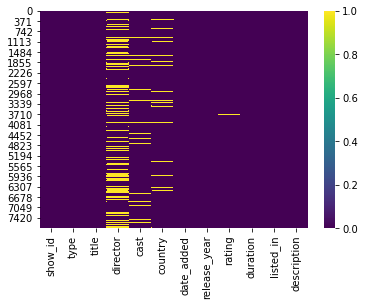

In [10]:
sns.heatmap(netflix_overall.isnull(), cmap='viridis')

director, cast, country, rating에 null values가 존재

In [11]:
netflix_overall['rating'].value_counts().unique()

array([2863, 1931,  806,  665,  386,  280,  271,  247,  194,   84,   39,
          6,    5,    3])

In [13]:
netflix_overall.drop(['director', 'cast'], axis=1, inplace=True)

In [14]:
netflix_overall.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



Netflix가 미국에서 생성되고 모두 Netflix US에서 방영되므로 국가 열의 모든 Nan 값을 United States로 대체 (전체 열을 삭제하는 대신 데이터를 저장하기 위해 열의 값을 교체)

In [15]:
netflix_overall['country'].replace(np.nan, 'United States', inplace=True)

이미 각 영화에 대해 연도를 공개했기 때문에 공개 날짜가 없어도 분석에 큰 영향을 미치지 않는다. -> 출시 날짜 열을 삭제

In [16]:
netflix_overall.drop(['date_added'], axis=1, inplace=True)

In [17]:
netflix_overall.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
netflix_overall['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [19]:
netflix_overall['listed_in'].value_counts()

Documentaries                                              334
Stand-Up Comedy                                            321
Dramas, International Movies                               320
Comedies, Dramas, International Movies                     243
Dramas, Independent Movies, International Movies           215
                                                          ... 
Classic & Cult TV, Crime TV Shows, TV Dramas                 1
Comedies, Cult Movies, Sports Movies                         1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
Crime TV Shows, TV Horror, TV Mysteries                      1
Kids' TV, TV Comedies, TV Sci-Fi & Fantasy                   1
Name: listed_in, Length: 492, dtype: int64

rating열에 누락 된 값을 가장 일반적인  TV-MA로 대체한다.

In [20]:
netflix_overall['rating'].replace(np.nan, 'TV-MA', inplace = True)

In [21]:
netflix_overall.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
netflix_overall.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


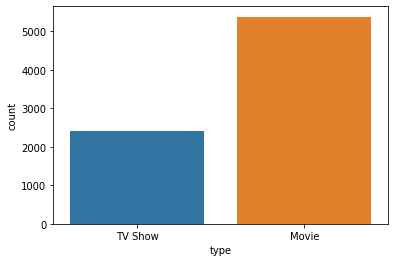

In [24]:
sns.countplot(x='type', data = netflix_overall)

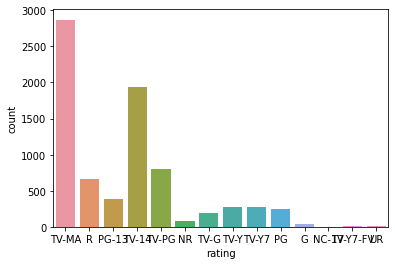

In [27]:
sns.countplot(x='rating', data= netflix_overall)

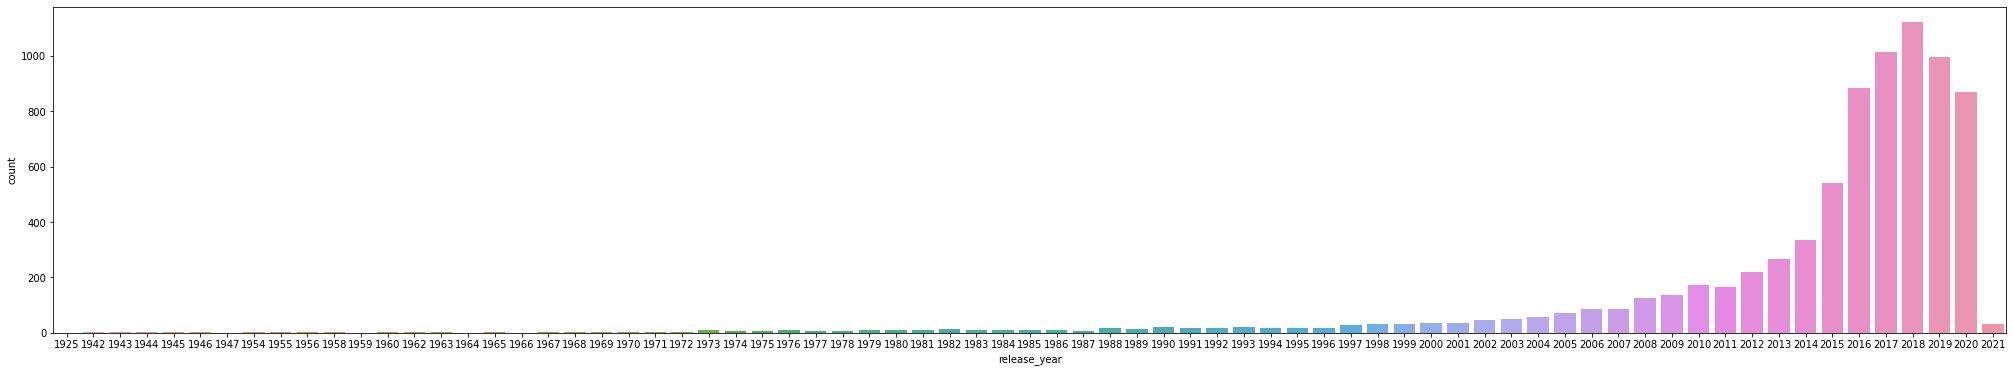

In [29]:
plt.figure(figsize=(35,6))
sns.countplot(x='release_year', data= netflix_overall)

Netflix의 대부분의 영화 및 TV 프로그램은 지난 10 년 동안 출시되었으며 이전에는 거의 출시되지 않았다.

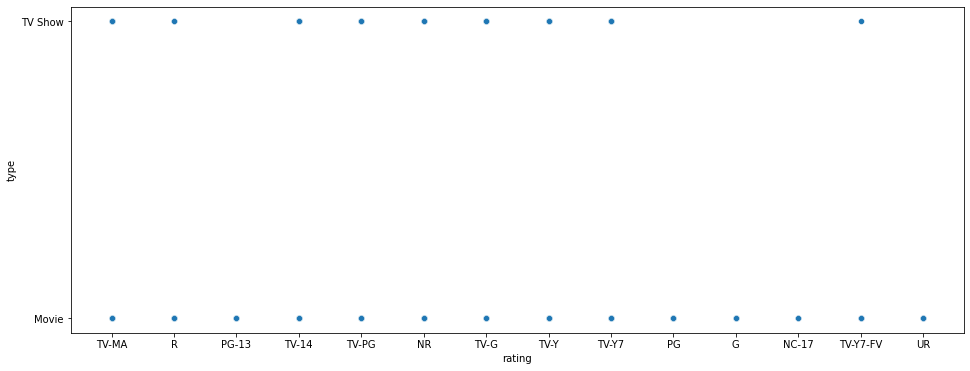

In [31]:
plt.figure(figsize= (16,6))
sns.scatterplot(x='rating', y='type', data=netflix_overall)

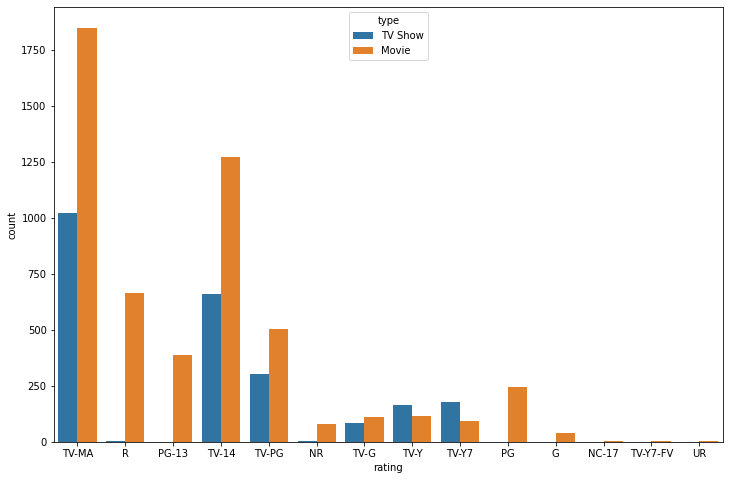

In [33]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_overall,hue='type')